<b><font size="5">Assignment: Riju Sathyan</b>

<b><font size="3">Real-world scenario</b>
The project uses the following data sets to demonstrate the various learnings throughout the course.

<table style="width:100%">
    <tr>
        <td style="text-align:left;width:25%"><b>Source Description</b></td>
        <td style="text-align:left;width:20%"><b>Source/File Name</b></td>    
        <td style="text-align:left;width:55%"><b>Source Link</b></td>        
    </tr>   
    <tr>
        <td style="text-align:left">Premier League Standings 22 Seasons</td>
        <td style="text-align:left">EPL_standings_2000-2022.csv</td>
        <td style="text-align:left">https://www.kaggle.com/datasets/quadeer15sh/premier-league-standings-11-seasons-20102021</td>     
    </tr>
    <tr>
        <td style="text-align:left">Champion League History - UK Teams</td>
        <td style="text-align:left">Wiki page table</td>             
        <td style="text-align:left">https://en.wikipedia.org/wiki/English_football_clubs_in_international_competitions</td>     
    </tr>
    <tr>
        <td style="text-align:left">Diabetes Data</td>
        <td style="text-align:left">diabetes.csv</td>            
        <td style="text-align:left;word-wrap: break-word;">https://www.kaggle.com/code/mathchi/diagnostic-a-patient-has-diabetes/data</td>        
    </tr>    
</table>

<b><font size="3">Importing Data: Web Scraping & Analysing Data</b>

In [1]:
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# This Wiki sourced dataset is being used to validate the information in the other dataset.
url = 'https://en.wikipedia.org/wiki/English_football_clubs_in_international_competitions'
page = requests.get(url)
df_wiki = pd.read_html(url)
df_wiki[3] #Check the correct table from Wiki Page is being picked up 

,Season,Club,Progress,Score,Opponents,Venue(s)
0,1955–56,None entered,None entered,None entered,None entered,None entered
1,1956–57,Manchester United,Semi-finals,3–5,Real Madrid,1–3 at Santiago Bernabéu2–2 at Old Trafford
2,1957–58,Manchester United,Semi-finals,2–5,Milan,2–1 at Old Trafford0–4 at San Siro
3,1958–59,Manchester United,First round,NaN,Young Boys,Walkover – United withdrawn by the Football Le...
4,1958–59,Wolverhampton Wanderers,First round,3–4,Schalke 04,2–2 at Molineux1–2 at Glückauf-Kampfbahn
...,...,...,...,...,...,...
139,2020–21,Chelsea,Winners,1–0,Manchester City,Estádio do Dragão
140,2021–22,Manchester United,Round of 16,1–2,Atlético Madrid,1–1 at Wanda Metropolitano0–1 at Old Trafford
141,2021–22,Chelsea,Quarter-finals,4–5 (a.e.t.),Real Madrid,1–3 at Stamford Bridge3–2 at Santiago Bernabéu
142,2021–22,Manchester City,Semi-finals,5–6 (a.e.t.),Real Madrid,4–3 at Etihad Stadium1–3 at Santiago Bernabéu


In [2]:
# Only Season & Club of relevance for this exercise
df_wiki[3][['Season','Club']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  144 non-null    object
 1   Club    144 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [3]:
df_wiki[3][['Season','Club']].describe()

,Season,Club
count,144,144
unique,67,19
top,2005–06,Manchester United
freq,5,31


In [4]:
#Create new dataframe to check for referential integrity of Season column
df_SeasonsCL = pd.DataFrame(df_wiki[3]['Season'],  columns=['Season'])
df_SeasonsCL['Season'] = df_SeasonsCL['Season'].str.replace('–','-')

#Use Regex to check for inconsistent text formats 
df_SeasonsCL['DQ_Season'] = df_SeasonsCL['Season'].str.contains(r'\d\d\d\d\-\d\d$', regex=True)

print(df_SeasonsCL.loc[df_SeasonsCL['DQ_Season'] == False])

        Season  DQ_Season
42  1990-91[a]      False
53   1999-2000      False
54   1999-2000      False
55   1999-2000      False


In [5]:
#Update incorrectly formatted values
df_SeasonsCL.loc[42,['Season']] = '1990-91'
df_SeasonsCL.loc[53,['Season']] = '1999-00'
df_SeasonsCL.loc[54,['Season']] = '1999-00'
df_SeasonsCL.loc[55,['Season']] = '1999-00'

In [6]:
#Create a dataframe with CL season unique values, sort columns and then create a PL (qualification) season
# ie this seasons CL entrants qualified from last seasons Premier League final standings.
df_seasons =  pd.DataFrame(df_SeasonsCL['Season'].unique(), columns=['CL Season'])
df_seasons.rename({'CL Season': 'Season CL'}, axis=1, inplace=True)
df_seasons.sort_values(by=['Season CL'])
df_seasons['Season PL']= df_seasons.shift(1) #shift rows, so create one season qualification lag

#Create a CL Season to Premier League (PL) qualification mapping dictionary & 
sm_d={}

# Iterate over column names & create dictionary
for i,j in df_seasons.iterrows():
   sm_d[df_seasons['Season CL'][i]] = df_seasons['Season PL'][i]

In [7]:
# Create new data frame with Season & Club
zipped = list(zip(df_SeasonsCL['Season'], df_wiki[3]['Club']))
df_English_teams_qualified =  pd.DataFrame(zipped, columns=['Season','Club'])
df_English_teams_qualified.rename({'Season': 'Season CL'}, axis=1, inplace=True)

df_English_teams_qualified['Season PLq'] = ''

# Iterate over Champions League Season and add appropriate Premier League Qualification season 
for i,j in  df_English_teams_qualified.iterrows():
    df_English_teams_qualified['Season PLq'][i] = sm_d[df_English_teams_qualified['Season CL'][i]]

df_English_teams_qualified.drop('Season CL', axis=1, inplace=True)
df_English_teams_qualified.tail(99)

,Club,Season PLq
45,Manchester United,1992-93
46,Manchester United,1993-94
47,Blackburn Rovers,1994-95
48,Manchester United,1995-96
49,Newcastle United,1996-97
...,...,...
139,Chelsea,2019-20
140,Manchester United,2020-21
141,Chelsea,2020-21
142,Manchester City,2020-21


<b><font size="3">Importing Data: Import CSV & Analysing Data</b>

In [8]:
#Import League data from csv
df_EPLs = pd.read_csv("datasets/EPL_standings_2000-2022.csv")
df_EPLs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [9]:
df_EPLs = df_EPLs[~df_EPLs['Season'].isin(['2021-22'])]

In [10]:
df_EPLs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       420 non-null    object
 1   Pos                          420 non-null    int64 
 2   Team                         420 non-null    object
 3   Pld                          420 non-null    int64 
 4   W                            420 non-null    int64 
 5   D                            420 non-null    int64 
 6   L                            420 non-null    int64 
 7   GF                           420 non-null    int64 
 8   GA                           420 non-null    int64 
 9   GD                           420 non-null    int64 
 10  Pts                          420 non-null    int64 
 11  Qualification or relegation  420 non-null    object
dtypes: int64(9), object(3)
memory usage: 42.7+ KB


In [11]:
df_EPLs.describe()

,Pos,Pld,W,D,L,GF,GA,GD,Pts
count,420.000000,420.0,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,10.500000,38.0,14.245238,9.509524,14.245238,50.735714,50.735714,0.000000,52.223810
std,5.773158,0.0,5.956834,2.821230,5.509753,15.598457,12.723202,25.647696,17.008559
min,1.000000,38.0,1.000000,2.000000,0.000000,20.000000,15.000000,-69.000000,11.000000
25%,5.750000,38.0,10.000000,8.000000,10.000000,40.000000,42.000000,-18.250000,41.000000
50%,10.500000,38.0,13.000000,9.000000,15.000000,47.000000,51.000000,-6.500000,48.000000
75%,15.250000,38.0,18.000000,11.000000,18.000000,59.250000,59.000000,16.500000,63.250000
max,20.000000,38.0,32.000000,17.000000,29.000000,106.000000,89.000000,79.000000,100.000000


In [12]:
#Convert text field to Boolean for Champion League qualification usgin regex
df_EPLs['CLQ_chk'] = df_EPLs['Qualification or relegation'].str.contains(r'(?=.*[Qq]ualification)(?=.*Champions League)', regex=True)
df_EPLs

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,CLQ_chk
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,True
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,True
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,True
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],False
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-21,16,Brighton & Hove Albion,38,9,14,15,40,46,-6,41,Not Applicable,False
416,2020-21,17,Burnley,38,10,9,19,33,55,-22,39,Not Applicable,False
417,2020-21,18,Fulham,38,5,13,20,27,53,-26,28,Relegation to the EFL Championship,False
418,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship,False


In [13]:
df_EPLs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       420 non-null    object
 1   Pos                          420 non-null    int64 
 2   Team                         420 non-null    object
 3   Pld                          420 non-null    int64 
 4   W                            420 non-null    int64 
 5   D                            420 non-null    int64 
 6   L                            420 non-null    int64 
 7   GF                           420 non-null    int64 
 8   GA                           420 non-null    int64 
 9   GD                           420 non-null    int64 
 10  Pts                          420 non-null    int64 
 11  Qualification or relegation  420 non-null    object
 12  CLQ_chk                      420 non-null    bool  
dtypes: bool(1), int64(9), object(3)
mem

In [14]:
df_ETQ_Teams_Unique = pd.DataFrame(df_English_teams_qualified['Club'].unique(), columns=['Original_ETQ_Name'])
df_EPLs_Teams_Unique = pd.DataFrame(df_EPLs['Team'].unique(), columns=['Original_EPLs_Name'])
df_ETQ_Teams_Unique

,Original_ETQ_Name
0,None entered
1,Manchester United
2,Wolverhampton Wanderers
3,Burnley
4,Tottenham Hotspur
5,Ipswich Town
6,Everton
7,Liverpool
8,Manchester City
9,Leeds United


In [15]:
df_Team_Names_Map = pd.merge(df_EPLs_Teams_Unique, df_ETQ_Teams_Unique, left_on=['Original_EPLs_Name'], right_on=['Original_ETQ_Name'], how='right')
df_Team_Names_Map['Match_chk'] = np.where((df_Team_Names_Map['Original_EPLs_Name'] == df_Team_Names_Map['Original_ETQ_Name']), True, False)
df_Team_Names_Map 

,Original_EPLs_Name,Original_ETQ_Name,Match_chk
0,NaN,None entered,False
1,Manchester United,Manchester United,True
2,Wolverhampton Wanderers,Wolverhampton Wanderers,True
3,Burnley,Burnley,True
4,Tottenham Hotspur,Tottenham Hotspur,True
5,Ipswich Town,Ipswich Town,True
6,Everton,Everton,True
7,Liverpool,Liverpool,True
8,Manchester City,Manchester City,True
9,Leeds United,Leeds United,True


In [16]:
df_final_table = pd.merge(df_EPLs, df_English_teams_qualified, left_on=['Season','Team'], right_on=['Season PLq','Club'], how='left')
df_final_table.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,CLQ_chk,Club,Season PLq
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,True,Manchester United,2000-01
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,True,Arsenal,2000-01
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,True,Liverpool,2000-01
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],False,NaN,NaN
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],False,NaN,NaN


In [17]:
# Validate the Champions league qualification is the same from both underlying data sources
print("Unmatched Team Names: ", df_final_table.loc[(df_final_table['Club'].isna()) & (df_final_table['CLQ_chk'] == True)].shape[0])

Unmatched Team Names:  0


In [18]:
df_final_table.drop(['Club','Season PLq', 'Qualification or relegation'], axis=1, inplace=True)
df_final_table.rename({'CLQ_chk': 'CL Qualified'}, axis=1, inplace=True)
df_final_table.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,CL Qualified
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,True
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,True
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,True
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,False
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,False


In [19]:
df_final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        420 non-null    object
 1   Pos           420 non-null    int64 
 2   Team          420 non-null    object
 3   Pld           420 non-null    int64 
 4   W             420 non-null    int64 
 5   D             420 non-null    int64 
 6   L             420 non-null    int64 
 7   GF            420 non-null    int64 
 8   GA            420 non-null    int64 
 9   GD            420 non-null    int64 
 10  Pts           420 non-null    int64 
 11  CL Qualified  420 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 39.8+ KB


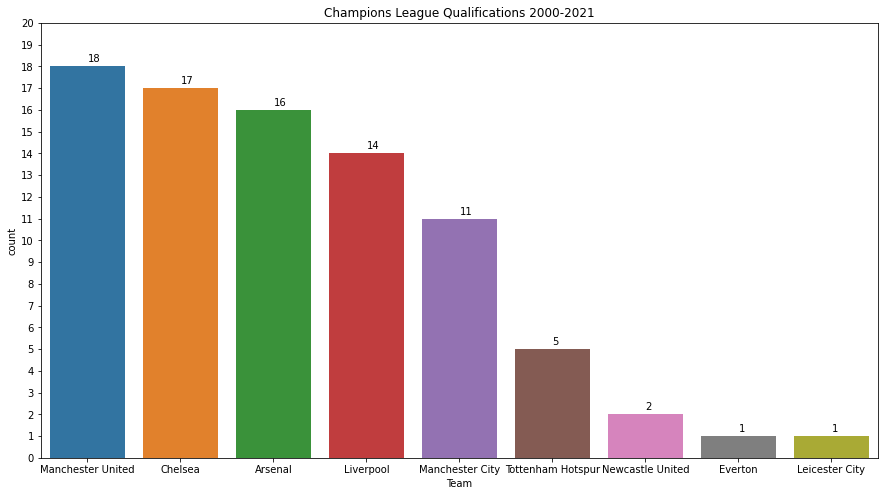

In [20]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x=df_final_table[df_final_table['CL Qualified'] == True]['Team'],
                   order=df_final_table[df_final_table['CL Qualified'] == True]['Team'].value_counts().index)
ax.set(title='Champions League Qualifications 2000-2021')
ax.set_yticks(range(21))

for p in ax.patches:
    height = p.get_height() # get the height of each bar
     
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals

plt.savefig('PL2000-21 most qualifications countplot.png')
plt.show()

In [21]:
def get_teams():
    '''This function accesses the df_final_table and returns stats all the Team names (alphabetically), 
that played in the Premier League between 2000-2021.
'''
    
    df_teams_unique = df_final_table['Team'].unique()
    df_teams_unique = np.sort(df_teams_unique)
    return df_teams_unique

def get_history(my_team):
    '''This function accesses the df_final_table and returns stats on Champions League qualification between 2000-2021..  
Pass in the team name as the parameter.  The returned results will be in the form of a tuple, and contain:

(i) Team name (use get_teams(), for a full list)
(ii) Seasons where team qualified 
(iii) Seasons where team did not qualify 
(iv) To seasons in Premier League over the period of the dataset
(v) Lowest points to achieve qualification
(vi) Highest points when team did not qualify
'''
    
    df_qualified = df_final_table[(df_final_table['CL Qualified'] == True) & (df_final_table['Team'] == my_team)]
    qualified = df_qualified.shape[0]
    qualified_min_points = df_qualified['Pts'].min() 
    
    df_dnq = df_final_table[(df_final_table['CL Qualified'] == False) & (df_final_table['Team'] == my_team)]
    dnq = df_dnq.shape[0]    
    dnq_max_points = df_dnq['Pts'].max() 
    
    total_seasons = qualified + dnq
    return (my_team, qualified, dnq, total_seasons, qualified_min_points, dnq_max_points)

In [22]:
print(get_history.__doc__)

This function accesses the df_final_table and returns stats on Champions League qualification between 2000-2021..  
Pass in the team name as the parameter.  The returned results will be in the form of a tuple, and contain:

(i) Team name (use get_teams(), for a full list)
(ii) Seasons where team qualified 
(iii) Seasons where team did not qualify 
(iv) To seasons in Premier League over the period of the dataset
(v) Lowest points to achieve qualification
(vi) Highest points when team did not qualify



In [23]:
all_teams = get_teams()

In [24]:
for x in all_teams[0:9]:
    print(get_history(x))

('Arsenal', 16, 5, 21, 67, 75)
('Aston Villa', 0, 18, 18, nan, 64)
('Birmingham City', 0, 7, 7, nan, 50)
('Blackburn Rovers', 0, 11, 11, nan, 63)
('Blackpool', 0, 1, 1, nan, 39)
('Bolton Wanderers', 0, 11, 11, nan, 58)
('Bournemouth', 0, 5, 5, nan, 46)
('Bradford City', 0, 1, 1, nan, 26)
('Brighton & Hove Albion', 0, 4, 4, nan, 41)


<b><font size="3">Machine Learning</b>

In [109]:
# Import necessary modules
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import f1_score
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import classification_report
#from sklearn.metrics import roc_auc_score

In [110]:
# Load dataset
df = pd.read_csv("datasets/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [111]:
# Print DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
# Print summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


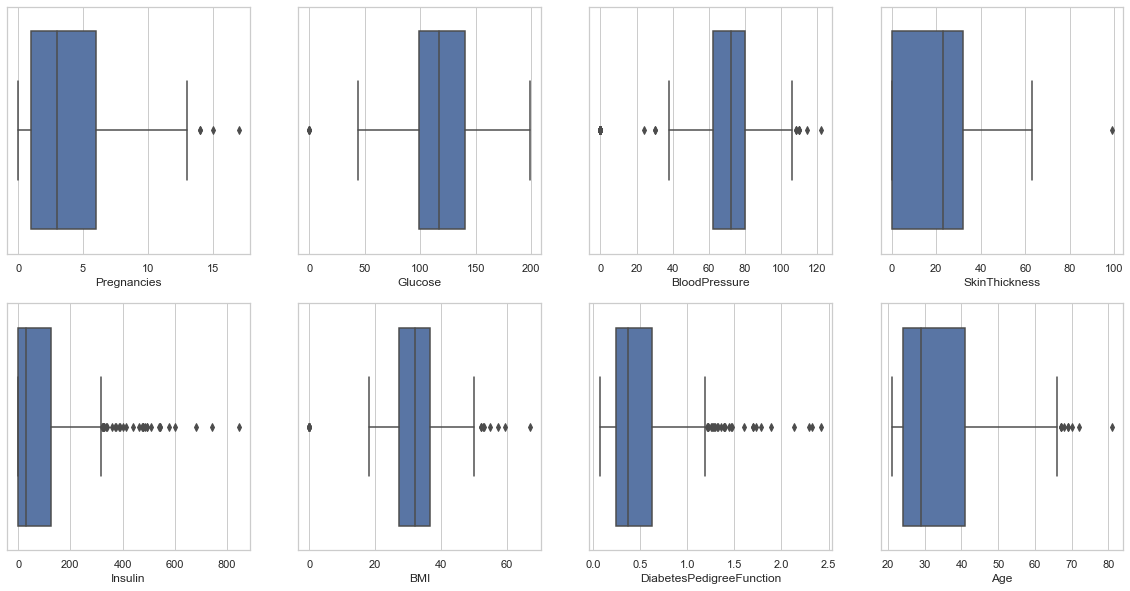

In [113]:
#Univariate analysis
columns = df.columns
counter = 1

f = plt.figure(figsize=(20,10))

for col in df.columns[0:-1]:
    f.add_subplot(2,4,counter)
    sns.boxplot(x=df[col])
    counter = counter + 1

In [114]:
col_dq = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]  # Zero pregancies are deemed a valid result
df[col_dq] = df[col_dq].replace(['0',0], np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [115]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [116]:
df[col_dq] = df[col_dq].fillna(df[col_dq].median())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


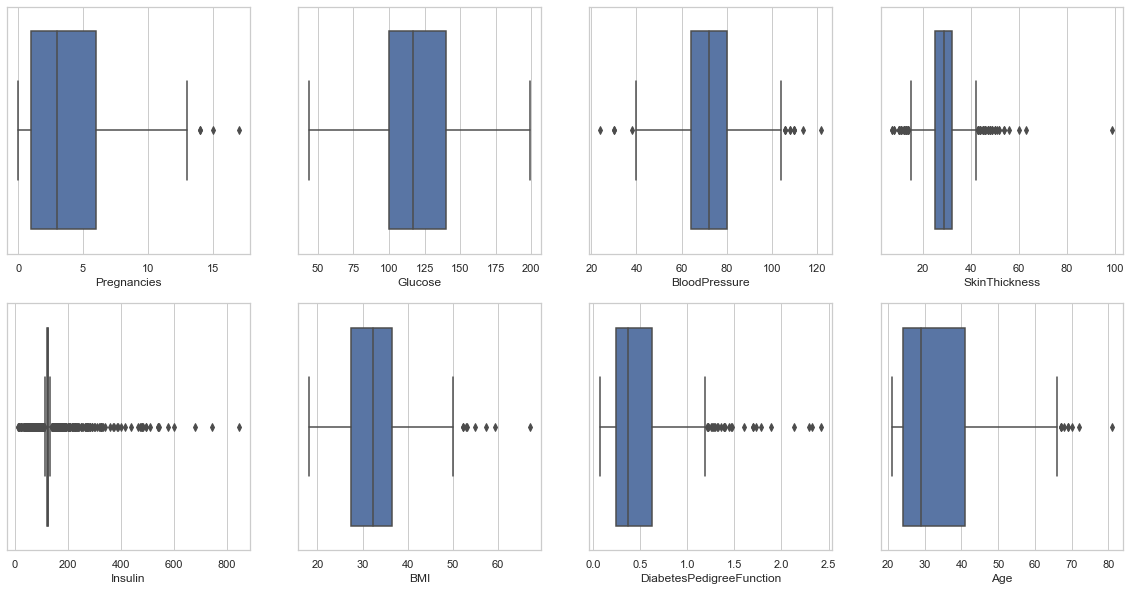

In [117]:
counter = 1

f = plt.figure(figsize=(20,10))

for col in df.columns[0:8]:
    f.add_subplot(2,4,counter)
    sns.boxplot(x=df[col])
    counter = counter + 1

In [118]:
print("DF Shape (before outliers removed): ", df.shape)

DF Shape (before outliers removed):  (768, 9)


In [119]:
outlier_column_name = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']
outlier_column_upper_limit = []
outlier_column_lower_limit = []

#Calculate upper and lower limits for outliers
for c in outlier_column_name:
    upper_limit = df[c].quantile(0.995)
    outlier_column_upper_limit.append(upper_limit)
    lower_limit = df[c].quantile(0.005)
    outlier_column_lower_limit.append(lower_limit)    
    print(c, "upper limit: ",upper_limit)
    print(c, "lower limit: ", lower_limit)
    print(" # upper outliers:" , df[df[c] > upper_limit].shape[0] )
    print(" # lower outliers:" , df[df[c] < lower_limit].shape[0] )
    print("")

#Remove outliers
for x in range(len(outlier_column_name)):
    df = df.loc[(df[outlier_column_name[x]] <= outlier_column_upper_limit[x]) & 
                (df[outlier_column_name[x]] >= outlier_column_lower_limit[x]) ]

Pregnancies upper limit:  13.164999999999964
Pregnancies lower limit:  0.0
 # upper outliers: 4
 # lower outliers: 0

Glucose upper limit:  197.0
Glucose lower limit:  60.34
 # upper outliers: 2
 # lower outliers: 4

BloodPressure upper limit:  110.0
BloodPressure lower limit:  39.67
 # upper outliers: 2
 # lower outliers: 4

SkinThickness upper limit:  54.32999999999993
SkinThickness lower limit:  9.67
 # upper outliers: 4
 # lower outliers: 4

Insulin upper limit:  582.4649999999992
Insulin lower limit:  18.0
 # upper outliers: 4
 # lower outliers: 3

BMI upper limit:  53.496999999999936
BMI lower limit:  18.9845
 # upper outliers: 4
 # lower outliers: 4

DiabetesPedigreeFunction upper limit:  1.933259999999991
DiabetesPedigreeFunction lower limit:  0.087505
 # upper outliers: 4
 # lower outliers: 4



In [120]:
print("DF Shape (after outliers removed): ", df.shape)

DF Shape (after outliers removed):  (726, 9)


In [122]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,3.851240,121.763085,72.549587,28.960055,137.747934,32.371350,0.460428,33.230028,0.345730
std,3.265691,29.510518,11.412136,8.065751,75.030466,6.386259,0.303584,11.705147,0.475934
min,0.000000,61.000000,44.000000,10.000000,18.000000,19.100000,0.088000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.365500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,125.750000,36.375000,0.612750,40.750000,1.000000
max,13.000000,197.000000,110.000000,54.000000,579.000000,52.900000,1.893000,81.000000,1.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               726 non-null    int64  
 1   Glucose                   726 non-null    float64
 2   BloodPressure             726 non-null    float64
 3   SkinThickness             726 non-null    float64
 4   Insulin                   726 non-null    float64
 5   BMI                       726 non-null    float64
 6   DiabetesPedigreeFunction  726 non-null    float64
 7   Age                       726 non-null    int64  
 8   Outcome                   726 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.7 KB


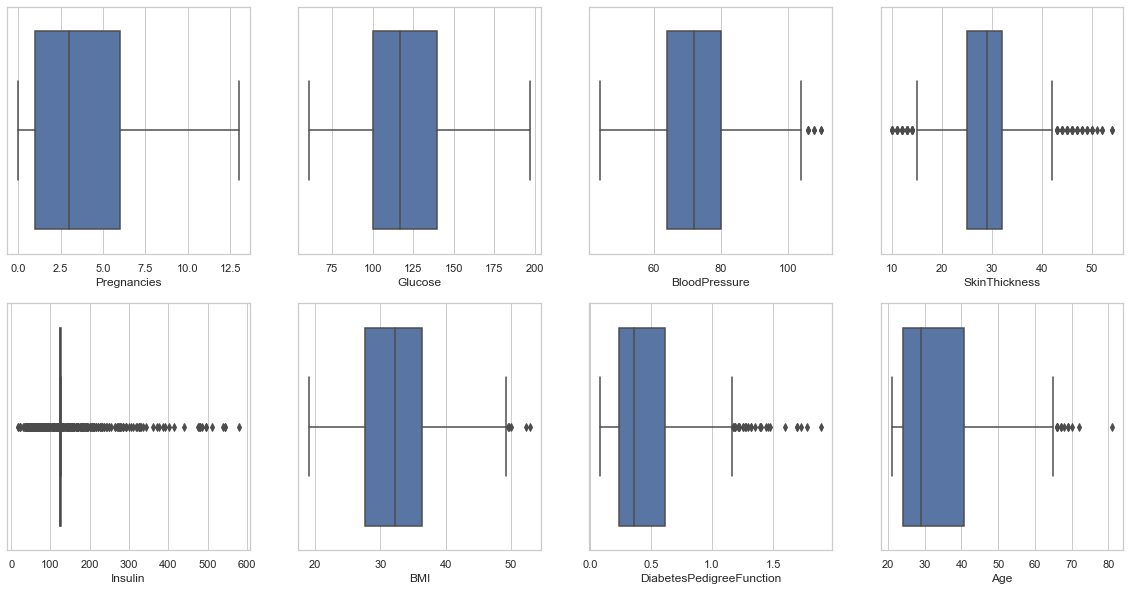

In [124]:
f = plt.figure(figsize=(20,10))
counter =1

for col in df.columns[0:8]:
    f.add_subplot(2,4,counter)
    sns.boxplot(x=df[col])
    counter = counter + 1

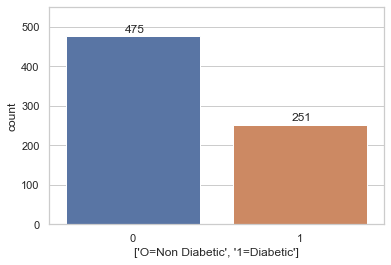

In [149]:
ax = sns.countplot(x='Outcome', data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))
ax.set(ylim=(0, 550), xlabel=['O=Non Diabetic','1=Diabetic'])
plt.savefig('Diabetes outcome countplot.png')
plt.show()

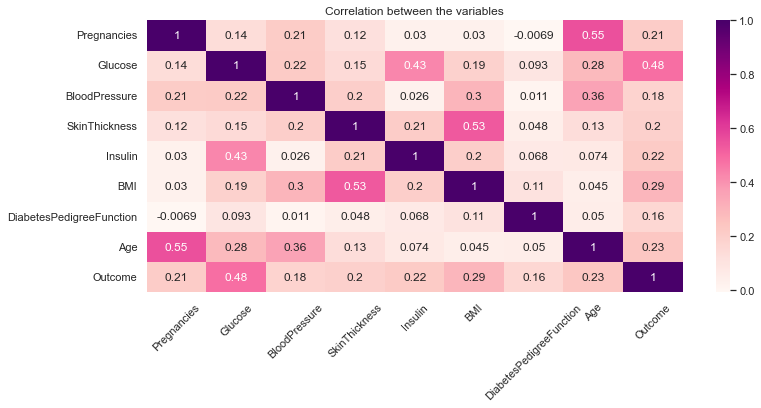

In [127]:
#correlation matrix and the heatmap
plt.subplots(figsize=(12,5))
table_correlation=df.corr()
sns.heatmap(table_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)
plt.savefig('diabetes correlation matrix heatmap.png')

In [128]:
df[df['Outcome'] == 0].describe() # Non-diabetic stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.0
mean,3.353684,111.387368,71.073684,27.806316,125.741053,31.012211,0.424187,31.233684,0.0
std,3.037939,24.045523,11.258791,8.353753,64.582416,6.184380,0.285323,11.654399,0.0
min,0.000000,61.000000,44.000000,10.000000,18.000000,19.100000,0.088000,21.000000,0.0
25%,1.000000,94.000000,64.000000,23.000000,95.000000,26.000000,0.231000,23.000000,0.0
50%,2.000000,108.000000,72.000000,29.000000,125.000000,30.800000,0.334000,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,125.000000,35.300000,0.551000,37.000000,0.0
max,13.000000,194.000000,110.000000,54.000000,545.000000,47.900000,1.781000,81.000000,0.0


In [129]:
df[df['Outcome'] == 1].describe() # Diabetic stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.0
mean,4.792829,141.398406,75.342629,31.143426,160.470120,34.943426,0.529012,37.007968,1.0
std,3.474033,28.942160,11.197238,7.002524,87.323961,5.967176,0.325121,10.858358,0.0
min,0.000000,78.000000,48.000000,12.000000,29.000000,22.900000,0.088000,21.000000,1.0
25%,2.000000,118.500000,68.000000,29.000000,125.000000,30.850000,0.261000,28.000000,1.0
50%,4.000000,139.000000,74.000000,29.000000,125.000000,34.100000,0.441000,36.000000,1.0
75%,7.500000,165.500000,82.000000,35.000000,165.000000,38.200000,0.720000,44.000000,1.0
max,13.000000,197.000000,110.000000,51.000000,579.000000,52.900000,1.893000,70.000000,1.0


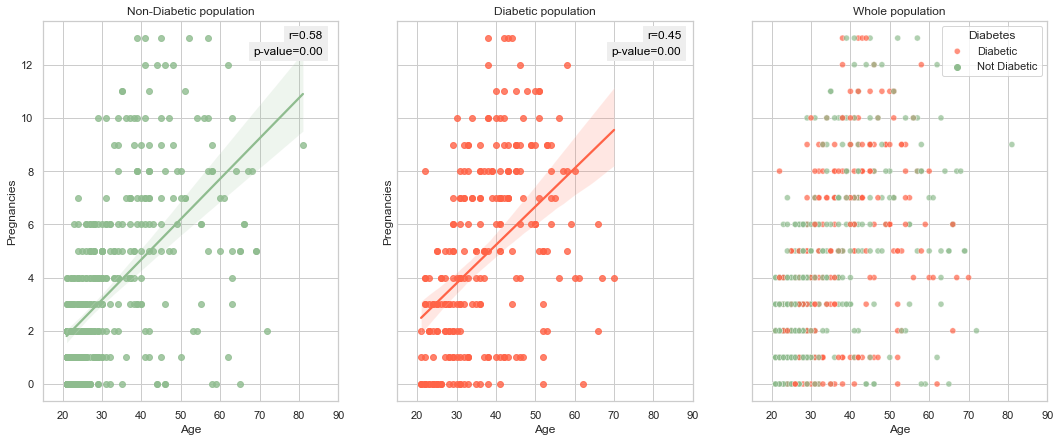

In [130]:
d0_ap_stats = stats.pearsonr(df[df['Outcome'] == 0]['Age'], 
                             df[df['Outcome'] == 0]['Pregnancies'])

d1_ap_stats = stats.pearsonr(df[df['Outcome'] == 1]['Age'], 
                             df[df['Outcome'] == 1]['Pregnancies'])
sns.set()
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3, figsize=(18, 7),sharey=True)

sns.regplot(x='Age',
            y='Pregnancies',
            data=df[df['Outcome'] == 0],
            ax=ax[0],
            color='darkseagreen'
            );
plt.text(-94, 13, "r={:0.2f}".format(d0_ap_stats[0]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(-94, 12.4, "p-value={:0.2f}".format(d0_ap_stats[1]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.regplot(x='Age',
            y='Pregnancies',
            data=df[df['Outcome'] == 1],
            ax=ax[1],
            color='tomato'
            );

plt.text(-3, 13, "r={:0.2f}".format(d1_ap_stats[0]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(-3, 12.4, "p-value={:0.2f}".format(d1_ap_stats[1]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.scatterplot(x='Age',
                y='Pregnancies',
                data=df,
                hue='Outcome',
                ax=ax[2],
                palette=['darkseagreen','tomato'],
                alpha=0.7)
plt.legend(title='Diabetes', loc='upper right', labels=['Diabetic', 'Not Diabetic'])
ax[0].set(xlim=(15, 90))
ax[0].set_title("Non-Diabetic population")
ax[1].set(xlim=(15, 90))
ax[1].set_title("Diabetic population")
ax[2].set(xlim=(15, 90))
ax[2].set_ylabel("Skin Thickness")
ax[2].set_title("Whole population")
plt.show()

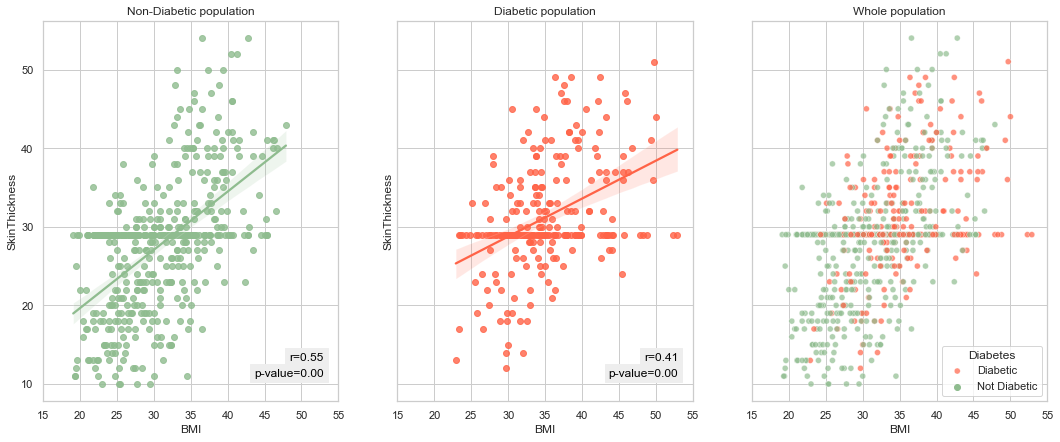

In [131]:
d0_ap_stats = stats.pearsonr(df[df['Outcome'] == 0]['BMI'], 
                             df[df['Outcome'] == 0]['SkinThickness'])

d1_ap_stats = stats.pearsonr(df[df['Outcome'] == 1]['BMI'], 
                             df[df['Outcome'] == 1]['SkinThickness'])
sns.set()
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3, figsize=(18, 7),sharey=True)

sns.regplot(x='BMI',
            y='SkinThickness',
            data=df[df['Outcome'] == 0],
            ax=ax[0],
            color='darkseagreen'
            );
plt.text(-43, 13, "r={:0.2f}".format(d0_ap_stats[0]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(-43, 11, "p-value={:0.2f}".format(d0_ap_stats[1]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.regplot(x='BMI',
            y='SkinThickness',
            data=df[df['Outcome'] == 1],
            ax=ax[1],
            color='tomato'
            );

plt.text(5, 13, "r={:0.2f}".format(d1_ap_stats[0]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')
plt.text(5, 11, "p-value={:0.2f}".format(d1_ap_stats[1]), horizontalalignment='right', size='medium', color='black', weight='normal', backgroundcolor= '#EEEEEE')

sns.scatterplot(x='BMI',
                y='SkinThickness',
                data=df,
                hue='Outcome',
                ax=ax[2],
                palette=['darkseagreen','tomato'],
                alpha=0.7)
plt.legend(title='Diabetes', loc='lower right', labels=['Diabetic', 'Not Diabetic'])
ax[0].set(xlim=(15, 55))
ax[0].set_title("Non-Diabetic population")
ax[1].set(xlim=(15, 55))
ax[1].set_title("Diabetic population")
ax[2].set(xlim=(15, 55))
ax[2].set_ylabel("Skin Thickness")
ax[2].set_title("Whole population")
plt.show()

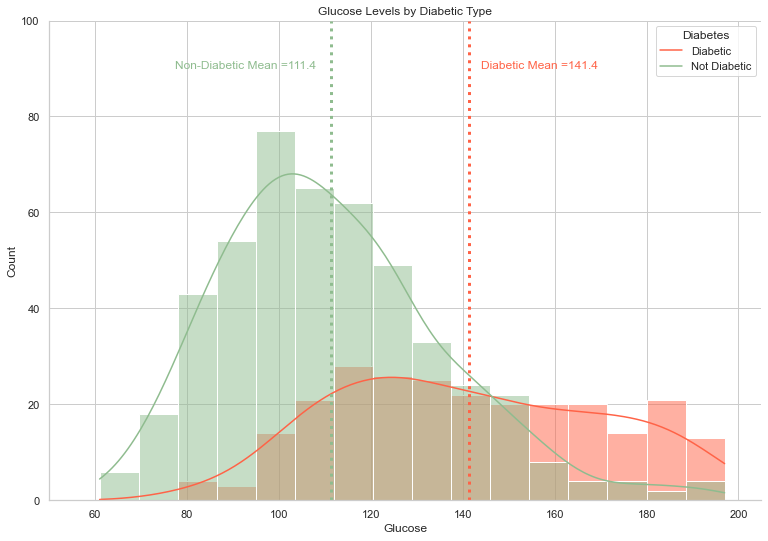

In [132]:
ax = sns.displot(x=df['Glucose'],hue=df['Outcome'], kde=True, palette=['darkseagreen','tomato'], legend=False)
plt.legend(title='Diabetes', loc='upper right', labels=['Diabetic', 'Not Diabetic'])
plt.axvline(x=df['Glucose'][df['Outcome'] == 0].mean(),
            color='darkseagreen', linewidth=3, linestyle = 'dotted')
plt.axvline(x=df['Glucose'][df['Outcome'] == 1].mean(),
            color='tomato', linewidth=3, linestyle = 'dotted')
plt.text(108, 90, "Non-Diabetic Mean ={:0.1f}".format(df['Glucose'][df['Outcome'] == 0].mean()), 
         fontsize=10,color='darkseagreen', horizontalalignment='right', size=12)
plt.text(144, 90, "Diabetic Mean ={:0.1f}".format(df['Glucose'][df['Outcome'] == 1].mean()), 
         fontsize=10,color='tomato', horizontalalignment='left', size=12)
ax.set(title='Glucose Levels by Diabetic Type')
ax.set(xlim=(50, 205))
ax.set(ylim=(0, 100))
ax.fig.set_figwidth(12)
ax.fig.set_figheight(8)

In [133]:
glucose0 = df['Glucose'][df['Outcome'] == 0]
glucose1 = df['Glucose'][df['Outcome'] == 1]

print('Non diabetic: mean=%.3f stdv=%.3f' % (np.mean(glucose0), np.std(glucose0)))
print('Diabetic: mean=%.3f stdv=%.3f' % (np.mean(glucose1), np.std(glucose1)))

Non diabetic: mean=111.387 stdv=24.020
Diabetic: mean=141.398 stdv=28.884


In [134]:
stat, p = stats.ttest_ind(glucose0, glucose1)
print("Calculated value=%.4f " % (stat))
print("p-value : %.4f\n"% (p))
print("Test the null hypothesis (H0): both data sets have the same mean.")
# interpret
alpha = 0.01
if p > alpha:
	print('Result: Same distributions (fail to reject H0)')
else:
	print('Result: Different distributions (reject H0)')

Calculated value=-14.8826 
p-value : 0.0000

Test the null hypothesis (H0): both data sets have the same mean.
Result: Different distributions (reject H0)


In [142]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=23)

# Create dictionary to store results
model_results = {}

In [143]:
##########################################################
### MODEL FIT & PREDICTIONS USING DEFAULT PARAMETERS  ####
##########################################################

models =[('RDF', RandomForestClassifier(n_estimators=100, random_state = 999), True),
         ('DTC', DecisionTreeClassifier(random_state = 999), True),
         ('SVM' , svm.SVC(kernel='linear'), False),
         ('KNN' , KNeighborsClassifier(), False)]

for name, model, fi_flag in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    model_accuracy = metrics.accuracy_score(y_test, y_pred)
    model_results[name] = {"pre hypertuning/default accuracy score": model_accuracy}

    if fi_flag == True :
        feature_imp = pd.Series(clf.feature_importances_,index=X.columns,name=name).sort_values(ascending=False)
        print("Feature Importance: ",name)
        print(feature_imp)
        print('')


Feature Importance:  RDF
Glucose                     0.303646
BMI                         0.138453
Age                         0.124576
DiabetesPedigreeFunction    0.110892
BloodPressure               0.090488
Insulin                     0.084993
Pregnancies                 0.081874
SkinThickness               0.065078
Name: RDF, dtype: float64

Feature Importance:  DTC
Glucose                     0.371929
BMI                         0.130469
Age                         0.105302
Pregnancies                 0.100608
BloodPressure               0.089122
Insulin                     0.074707
SkinThickness               0.066267
DiabetesPedigreeFunction    0.061594
Name: DTC, dtype: float64



In [144]:
##############################
### HYPERPARAMETER TUNING ####
##############################

params_RDF = {'criterion':['gini','entropy'],
              'n_estimators':list(range(10,30)),
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[3,4,5,6,7], 
              'random_state':[999],
              'n_jobs':[-1]}

params_DTC = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': list(range(2,15)), 
             'min_samples_leaf':list(range(1,11)),
             'random_state':[999]}

params_SVM = {'C': [6,7,8,9,10,11,12], 
              'kernel': ['linear','rbf']}

params_KNN = {'n_neighbors':list(range(1,30)),
              'leaf_size': list(range(1,30)),
              'p': [1,2]}

models_ht =[('RDF', RandomForestClassifier(), params_RDF),
            ('DTC', DecisionTreeClassifier(random_state = 999), params_DTC),
            ('SVM', svm.SVC(), params_SVM),
            ('KNN', KNeighborsClassifier(), params_KNN)
           ]

for name, model, params in models_ht:
    grid = GridSearchCV(model, param_grid=params, n_jobs=-1)
    grid.fit(X_train,y_train)
    #model_results[name].update({"hyper tuning best parameters": grid.best_params_})
    print(name, "Best Hyper Parameters:\n",grid.best_params_)
    prediction=grid.predict(X_test)
    accuracy_score = metrics.accuracy_score(prediction,y_test)
    print(name, "Accuracy:", accuracy_score)
    model_results[name].update({"post hypertuning accuracy score": accuracy_score})
    print("##")

RDF Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 29, 'n_jobs': -1, 'random_state': 999}
RDF Accuracy: 0.738831615120275
##
DTC Best Hyper Parameters:
 {'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'random_state': 999}
DTC Accuracy: 0.6529209621993127
##
SVM Best Hyper Parameters:
 {'C': 9, 'kernel': 'linear'}
SVM Accuracy: 0.7250859106529209
##
KNN Best Hyper Parameters:
 {'leaf_size': 1, 'n_neighbors': 8, 'p': 2}
KNN Accuracy: 0.7147766323024055
##


In [145]:
for i in model_results:
    accuracy_change = model_results[i]['post hypertuning accuracy score'] - model_results[i]['pre hypertuning/default accuracy score']
    model_results[i].update({"improvement in accuracy score": accuracy_change})

In [146]:
df_model_results = pd.DataFrame(model_results)
df_model_results = df_model_results.T
df_model_results

,pre hypertuning/default accuracy score,post hypertuning accuracy score,improvement in accuracy score
RDF,0.728522,0.738832,0.010309
DTC,0.690722,0.652921,-0.037801
SVM,0.725086,0.725086,0.000000
KNN,0.694158,0.714777,0.020619


In [ ]:
***** TO BE DELETED *****

In [ ]:
model = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':list(range(1,30)),
          'leaf_size': list(range(1,30)),
          'p': [1,2]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
model_scores['KNN']['after'] = metrics.accuracy_score(prediction,y_test)

model_accuracy = metrics.accuracy_score(prediction,y_test)
model_scores['KNN'].update({"post hypertuning": model_accuracy})

In [ ]:
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[999],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

model_accuracy = metrics.accuracy_score(prediction,y_test)
model_scores['RDF'].update({"post hypertuning": model_accuracy})

In [ ]:
model= DecisionTreeClassifier(random_state=999)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)

model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

model_accuracy = metrics.accuracy_score(prediction,y_test)
model_scores['DTC'].update({"after hyp": model_accuracy})

In [ ]:
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

#Prediction
prediction=model1.predict(X_test)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

model_accuracy = metrics.accuracy_score(prediction,y_test)
model_scores['SVM'].update({"post hypertuning": model_accuracy})